In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.model_selection import train_test_split
from GA_functions import fitness, select_parents, crossover, mutation, GA_algorithm, GA_algorithm_unnormalized, conc_to_spectra, perform_iteration, set_seed #normalize_and_pca
from MCTS_v2_functions import zeroth_iteration, nth_iteration, plot_fitness, plot_spectra, perform_Surrogate_Prediction
from Prepare_Data_Functions import load_df, subtract_baseline, normalize_df, delete_rows

## Initialize and Load Data

Initialize the first iteration 

In [2]:
np.random.seed(2)
conc_array = np.random.dirichlet((1,1,1,1,1), 23)
conc_array_actual = conc_array

In [3]:
def perform_UV_vis(next_gen_conc, conc_array_actual, spectra_array_actual):
    current_gen_spectra = conc_to_spectra(next_gen_conc, sample_spectra[:,1:sample_conc.shape[1]+1])
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual

def export_to_csv(conc_array):
    sample_volume = 300 #uL 
    conc_array = conc_array*sample_volume
    for i in range(conc_array.shape[0]):
        for j in range(conc_array.shape[1]):
            if conc_array[i,j] < 5:
                conc_array[i,j] = 0
    conc_array = np.round(conc_array)
                
    df = pd.DataFrame(conc_array, columns =['red-stock', 'green-stock', 'blue-stock', 'yellow-stock', 'water-stock'])
    df.to_csv("concentration_array.csv", index = False)

def import_from_excel(filename, conc_array_actual, spectra_array_actual):
    sample_spectra = pd.read_excel(filename)
    current_gen_spectra = np.asarray(sample_spectra)
    conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
    spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))
    return current_gen_spectra, conc_array_actual, spectra_array_actual 

Export Concentrations as CSV

In [4]:
conc_array = conc_array[:,0:-1]

In [5]:
#export_to_csv(conc_array)

Import UV-Vis Spectra from Excel 

In [6]:
df = load_df(r'Spectra_Iteration_0.xlsx')
df = subtract_baseline(df, 'C8')
df = normalize_df(df)
df = df.drop(['C8'], axis = 1)
current_gen_spectra = np.asarray(df)
wavelength = current_gen_spectra[:,0]
current_gen_spectra = current_gen_spectra[:,1:].T


Load Desired Spectra

In [7]:
df_desired = load_df(r'Chocolate_Brown_spectra.xlsx')

In [8]:
df_desired = subtract_baseline(df_desired, 'C8')

In [9]:
df_desired = normalize_df(df_desired)

In [10]:
df_desired = df_desired.drop(['C8'], axis = 1)

In [11]:
x_test = df_desired['A1'].values.reshape(-1,1)

Additional Steps for the Zeroth Iteration

In [12]:
spectra_array = current_gen_spectra
conc_array_actual = conc_array
spectra_array_actual = spectra_array

## Analyze Fitness of Zeroth Iteration

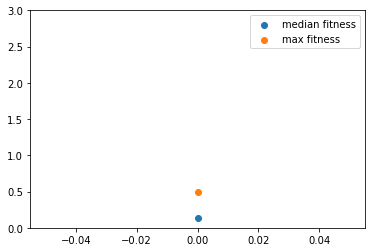

The max fitness is: 0.49004935715839615
The median fitness is: 0.12869949073592188


In [13]:
next_gen_conc, current_gen_spectra, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list = zeroth_iteration(conc_array, spectra_array, x_test)

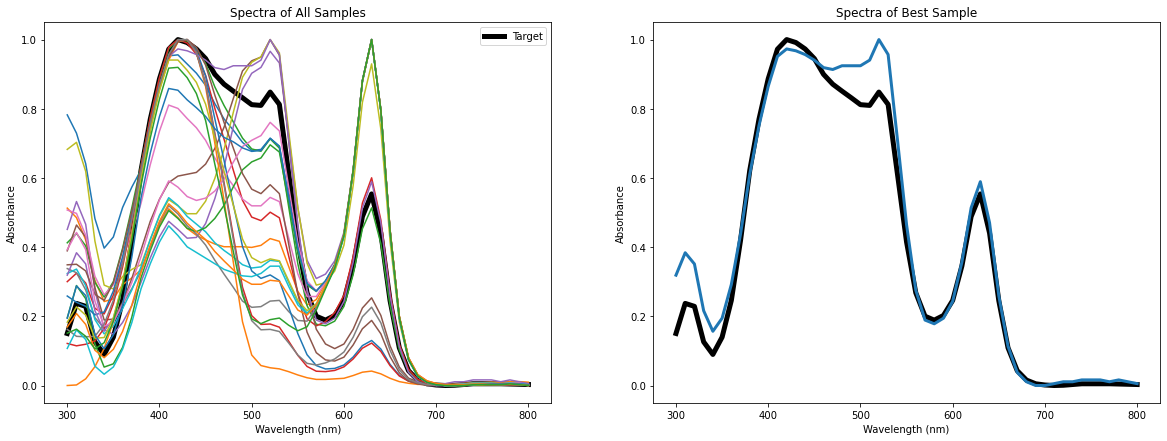

In [14]:
plot_spectra(current_gen_spectra, x_test, wavelength)

## Nth Iteration 

In [15]:
Iterations = 15
Moves_ahead = 5
GA_iterations = 5
n_samples = 23
seed = 6
mutation_rate, fitness_multiplier, mutation_rate_list_1, fitness_multiplier_list_1, best_move, best_move_turn, max_fitness, surrogate_score, next_gen_conc_1 = nth_iteration(Iterations, Moves_ahead, GA_iterations, n_samples, current_gen_spectra, next_gen_conc, x_test, conc_array_actual, spectra_array_actual, seed, median_fitness_list, max_fitness_list, iteration, mutation_rate_list, fitness_multiplier_list)

The best move has a fitness value of 0.5876565490641676
The best move occurs in 4 turns.

The surrogate model has a score of: 0.666462097690256

[[0.20942982 0.11622807 0.08991228 0.58442982]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.40117647 0.31647059 0.09647059 0.18588235]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.3946281  0.22520661 0.1053719  0.27479339]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.51124438 0.15892054 0.12293853 0.20689655]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.196      0.35866667 0.108      0.33733333]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.43834081 0.18609865 0.09192825 0.28363229]
 [0.37304688 0.20703125 0.16015625 0.25976562]
 [0.37304

In [16]:
best_move

array([[0.05      , 6.        , 0.3       , 4.        , 0.705     ,
        1.        , 0.7       , 7.        , 0.54828676, 0.46514683,
        0.52042082, 0.58765655]])

Run if satisfied with the best moves taken:

In [17]:
next_gen_conc = next_gen_conc_1
mutation_rate_list = mutation_rate_list_1
fitness_multiplier_list = fitness_multiplier_list_1

### Export Concentrations to CSV

In [18]:
#export_to_csv(next_gen_conc)

Create those samples using the OT2 and perfrom UV-Vis on them

### Import Spectra from excel 

In [19]:
#df = load_df(r'Spectra_iteration3_trial2.xlsx')
#df = subtract_baseline(df, 'C8')
#df = normalize_df(df)
#df = df.drop(['C8'], axis = 1)
#current_gen_spectra = np.asarray(df)
#wavelength = current_gen_spectra[:,0]
#current_gen_spectra = current_gen_spectra[:,1:].T

In [20]:
current_gen_spectra, score = perform_Surrogate_Prediction(next_gen_conc, conc_array_actual, spectra_array_actual)

In [21]:
conc_array_actual = np.vstack((conc_array_actual, next_gen_conc))
spectra_array_actual = np.vstack((spectra_array_actual, current_gen_spectra))

Plots the maximum and median fitness of the spectras of the next batch of samples.

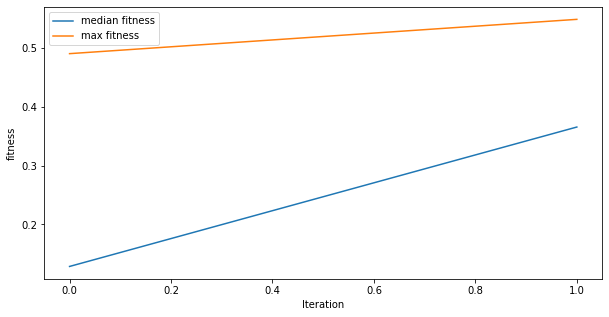

The max fitness is: 0.5482867641801796
The median fitness is: 0.36543274683391325


In [22]:
median_fitness_list, max_fitness_list, iteration = plot_fitness(next_gen_conc, current_gen_spectra, x_test, median_fitness_list, max_fitness_list, iteration)

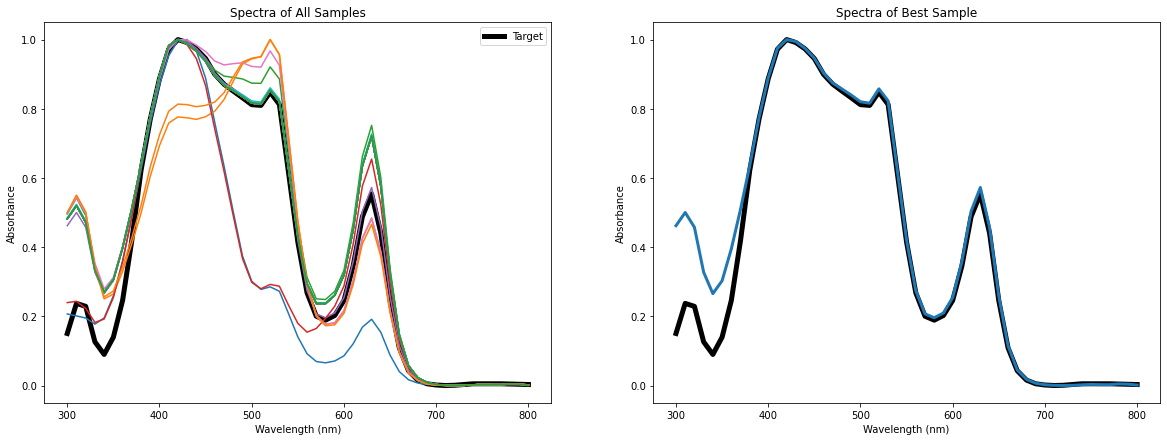

In [23]:
plot_spectra(current_gen_spectra, x_test, wavelength)

In [24]:
spectra = current_gen_spectra
desired = x_test
fitness_list = []    
for ii in range(spectra.shape[0]):
    fitness = 1/np.sum(np.abs(spectra[ii,:] - desired))
    fitness_list.append(fitness)
fitness_array = np.asarray(fitness_list).reshape(-1,1)
array = np.hstack((spectra, fitness_array))
sorted_array = array[np.argsort(array[:, -1])]

In [25]:
conc_fitness = np.hstack((next_gen_conc, fitness_array))

In [26]:
sorted_array = conc_fitness[np.argsort(conc_fitness[:, -1])]

In [27]:
sorted_array

array([[0.51124438, 0.15892054, 0.12293853, 0.20689655, 0.00098216],
       [0.50144509, 0.15317919, 0.11705202, 0.2283237 , 0.00098525],
       [0.20942982, 0.11622807, 0.08991228, 0.58442982, 0.00099044],
       [0.43834081, 0.18609865, 0.09192825, 0.28363229, 0.00100808],
       [0.3946281 , 0.22520661, 0.1053719 , 0.27479339, 0.00102548],
       [0.40117647, 0.31647059, 0.09647059, 0.18588235, 0.001033  ],
       [0.3745098 , 0.20784314, 0.16078431, 0.25686275, 0.00103607],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.16015625, 0.25976562, 0.00103627],
       [0.37304688, 0.20703125, 0.

In [28]:
brown, score = perform_Surrogate_Prediction(np.asarray([0.19, 0.15,0.07,0.11, .21]).reshape(1,-1), conc_array_actual, spectra_array_actual)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)

In [ ]:
wavelength.reshape(1,-1).shape

In [ ]:
brown.shape

In [ ]:
plt.plot(wavelength.reshape(1,-1).T, brown.T)
plt.plot(wavelength, desired)